# Chapter 1 - Exercise (연습문제)
문제를 기재한 마크다운 블록 아래에 파이썬 코드 블록이 한 개씩 주어집니다. 주어진 코드 블록 안에서 문제를 푸세요. 소문제가 여러 개 주어질 경우 코드 블록을 여러 개 추가해도 괜찮습니다. 단, 소문제가 주어질 때 주석으로 몇 번 소문제인지 꼭! 기재해주세요. 아래 방식과 비슷하게 해주시면 됩니다.
```Python
# 소문제 1 답안.
### 어쩌구저쩌구
# 소문제 2 답안.
```

In [1]:
# 이 블록 먼저 실행시키고 문제를 푸세요.
import numpy as np

In [ ]:
np.arange(1, 10000)[np.where(np.arange(1, 10000) % 4 !=0 & np.arange(1,10000) % 7 != 0)]

In [17]:
result = np.arange(1, 10000)[np.where((np.arange(1, 10000) % 4 != 0) & (np.arange(1, 10000) % 7 != 0))]
print(result)

[   1    2    3 ... 9997 9998 9999]


## 문제 1. 넘파이 기본 함수
0부터 10000까지의 수 중 4 또는 7로 나누어지는 수를 제외한 합을 구하세요. 단, `print()` 함수를 사용하는 경우를 제외하면, 딱 한 줄의 코드로 풀어야 합니다(`print()`를 꼭 사용하지 않아도 괜찮지만, 반드시 결과값이 출력되어야 합니다).  

In [19]:
result = np.arange(1, 10000)[np.where((np.arange(1, 10000) % 4 != 0) & (np.arange(1, 10000) % 7 != 0))].sum()
print(result)

32147142


## 문제 2. ndarray 및 통계 일반
$y=e^{-x/10}\sin\left(x\right)$에 대하여 $x$가 $\left[0,10 \right]$에서 10000개의 간격으로 분할되었다고 가정합시다.  
1. `np.arange()` 함수를 활용해 구간 $\left[0,10 \right]$을 10000개의 간격으로 분할한 ndarray를 출력하세요.
2. $x$ 범위 $\left[ 0,10 \right]$에서 함수 $y$를 plot하세요. `matplotlib.pyplot`을 import해서 그려도 좋습니다(기본 파트 4단원 자료 참고).  
3. $x$ 범위 $\left[ 4,7 \right]$에서 $y$의 평균과 표준편차를 계산하세요.  
4. $x$ 범위 $\left[ 4,7 \right]$에서, 전체 $y$ 값들의 80%가 $y_m$보다 작아지는 수 $y_m$의 값을 찾으세요.

In [21]:
# 소문제 1.

x = np.linspace(0, 10, 10000)
y = np.exp(-x/10) * np.sin(x)

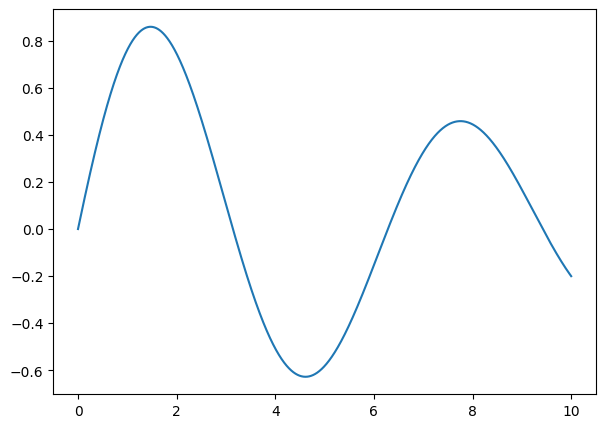

In [30]:
# 소문제 2.
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(x, y)
plt.show()

In [35]:
# 소문제 3.

# x 범위 [4, 7]에서의 y 값들을 추출
x_range = (x >= 4) & (x <= 7)
y_range = y[x_range]

# 평균과 표준편차 계산
mean_y = np.mean(y_range)
std_y = np.std(y_range)
print('평균 =', mean_y), print('표준편차 =', std_y)

평균 = -0.2956362863932012
표준편차 = 0.3144532369395424


(None, None)

In [37]:
# 소문제 4.

percentile80 = np.percentile(y_range, 80)
percentile80

0.061372680560897265

## 문제 3. 함수 - 브로드캐스팅
두 함수 $f_1\left(x\right) = x^2+\sin(\frac{\pi}{4}x)$와 $f_2\left(x\right) = e^{2x}+3\cos(\frac{\pi}{2}x)$가 있다고 합시다. 어떤 행렬 $A$가 아래와 같이 주어집니다.  
$$A=\begin{bmatrix}-1 & 2 & -4 \\ 0.5 & -1.5 & 8 \\ 1 & 0 & -0.5 \\ 1 & -2 & -4\end{bmatrix}$$  
이 행렬의 1행과 2행에는 함수 $f_1$을, 3행과 4행에는 함수 $f_2$를 적용한 결과를 출력하려고 합니다. 단, 원주율 $\pi$는 넘파이에서 `np.pi`로 호출해서 계산합니다.  
1. 파이썬의 함수 정의 기능과 넘파이 `np.sin()`, `np.cos()`, `np.pi`(이거는 함수 아님!), `np.exp()` 함수를 이용해 두 함수 $f_1$과 $f_2$를 정의하세요.
2. 주어진 행렬 $A$의 1행과 2행에는 함수 $f_1$을, 3행과 4행에는 함수 $f_2$를 적용해 그 결과를 담은 행렬 $B$를 출력하세요.
3. 소문제 2에서 계산한 행렬 $B$를 $2\times 6$ 크기와 $12\times 1$ 크기의 배열로 `reshape`하세요.

In [40]:
# 소문제 1.

def f1(x):
    return x**2 + np.sin(np.pi/4 * x)

def f2(x):
    return np.exp(2 * x) + 3 * np.cos(np.pi/2 * x)

In [65]:
# 소문제 2. 
## 아래에 정의해놓은 행렬 A의 데이터를 사용하면 됩니다.
A = np.array([[-1, 2, -4],
              [0.5, -1.5, 8],
              [1, 0, -0.5],
              [1, -2, -4]])

a,b = f1(A[:2,:]), f2(A[2:,:])

print(a)
print(b)
B = np.vstack([a,b]) #concatenate 도 가능
B

[[ 0.29289322  5.         16.        ]
 [ 0.63268343  1.32612047 64.        ]] [[ 7.3890561   4.          2.48919978]
 [ 7.3890561  -2.98168436  3.00033546]]
[[ 7.3890561   4.          2.48919978]
 [ 7.3890561  -2.98168436  3.00033546]]


array([[ 0.29289322,  5.        , 16.        ],
       [ 0.63268343,  1.32612047, 64.        ],
       [ 7.3890561 ,  4.        ,  2.48919978],
       [ 7.3890561 , -2.98168436,  3.00033546]])

In [66]:
# 소문제 3.
B_reshape = B.reshape(2, -1)
print(B_reshape, '/// shape = ' , B_reshape.shape)

print('---------------------------------------')

B_reshape = B.reshape(-1, 1)
print(B_reshape, '/// shape = ' , B_reshape.shape)

[[ 0.29289322  5.         16.          0.63268343  1.32612047 64.        ]
 [ 7.3890561   4.          2.48919978  7.3890561  -2.98168436  3.00033546]] /// shape =  (2, 6)
---------------------------------------
[[ 0.29289322]
 [ 5.        ]
 [16.        ]
 [ 0.63268343]
 [ 1.32612047]
 [64.        ]
 [ 7.3890561 ]
 [ 4.        ]
 [ 2.48919978]
 [ 7.3890561 ]
 [-2.98168436]
 [ 3.00033546]] /// shape =  (12, 1)
